y = 1/-1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(123)

%matplotlib inline

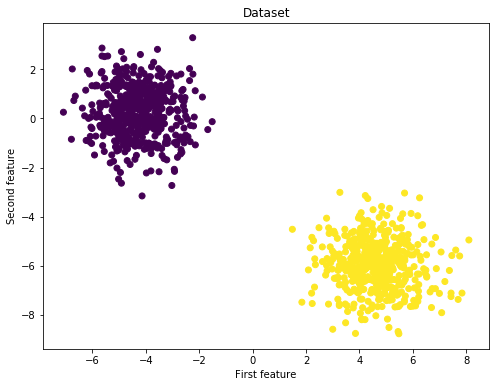

In [68]:
X,y = make_blobs(n_samples=1000,centers=2)
for i in range(1000):
    if y[i]==0:
        y[i] = -1
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [69]:
y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1))
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [70]:
y_train

array([[-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],

In [79]:
class my_Perceptron():
    def __init__(self):
        pass
    def train(self,X,y,learning_rate=0.05,n_iters=100):
        n_samples,n_features = X.shape
        
        self.weight = np.zeros((n_features,1))
        self.bias = 0
        delt_w = np.zeros((n_features,1))
        delt_b = 0
        
        for i in range(n_iters):
            a = np.dot(X,self.weight)+self.bias
            y_predict = self.step_function(a)
            if ((y!=y_predict).any()):  #(y-y_predict).any() is ok
                delt_w += learning_rate * np.dot(X.T,y)
                delt_b += learning_rate * np.sum(y)
            self.weight += delt_w
            self.bias += delt_b
            return self.weight,self.bias
    def step_function(self,x):
        return np.array([1 if elem>=0 else -1 for elem in x])[:,np.newaxis]
    def predict(self,X):
        a = np.dot(X,self.weight)+self.bias
        return self.step_function(a)

In [80]:
p = my_Perceptron()
w_train,b_train = p.train(X_train,y_train,learning_rate=0.05,n_iters=500)

In [81]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test)) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


In [82]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()

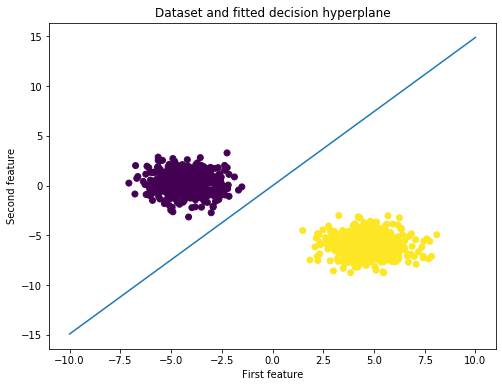

In [83]:
plot_hyperplane(X, y, w_train, b_train)